In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train  = pd.DataFrame(pd.read_csv('train.csv'))

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


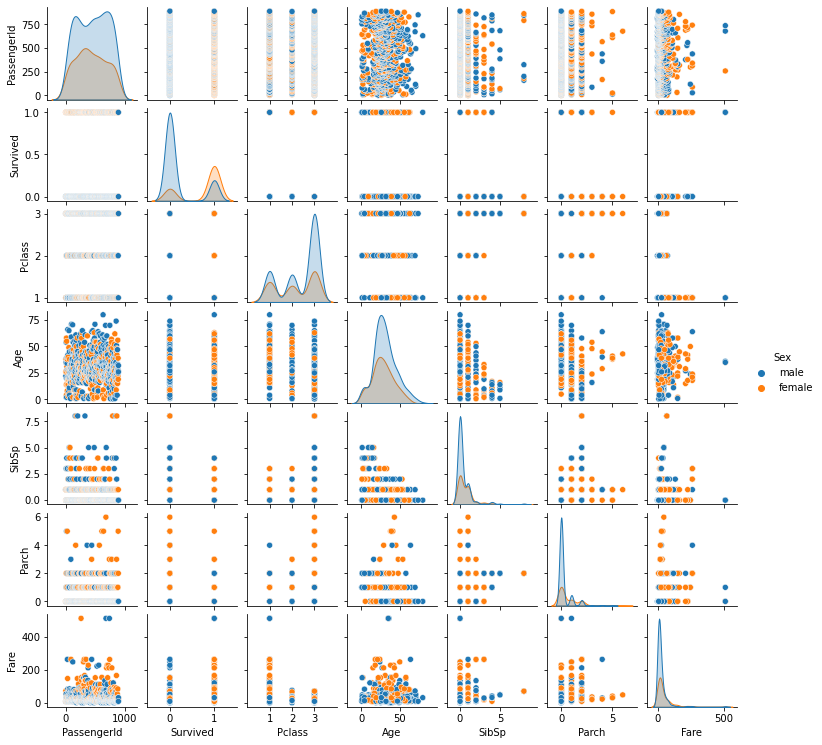

In [5]:
sns.pairplot(df_train, hue='Sex', height=1.5);

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.groupby(['Sex','Pclass'])[['Survived']].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [8]:
df_train.groupby(['Sex','Pclass'])[['Survived']].sum()

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

In [9]:
max_age=df_train.Age.max()
min_age=df_train.Age.min()
print(max_age)
print(min_age)

80.0
0.42


In [10]:
age=pd.cut(df_train['Age'],[0,18,80]).dropna()
age.head(30)

0     (18, 80]
1     (18, 80]
2     (18, 80]
3     (18, 80]
4     (18, 80]
6     (18, 80]
7      (0, 18]
8     (18, 80]
9      (0, 18]
10     (0, 18]
11    (18, 80]
12    (18, 80]
13    (18, 80]
14     (0, 18]
15    (18, 80]
16     (0, 18]
18    (18, 80]
20    (18, 80]
21    (18, 80]
22     (0, 18]
23    (18, 80]
24     (0, 18]
25    (18, 80]
27    (18, 80]
30    (18, 80]
33    (18, 80]
34    (18, 80]
35    (18, 80]
37    (18, 80]
38     (0, 18]
Name: Age, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

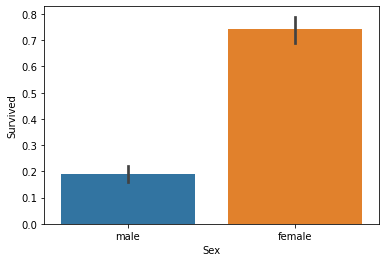

In [11]:
sns.barplot(x='Sex', y='Survived',data=df_train)

In [12]:
df_train.drop("Survived", axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='Age'>

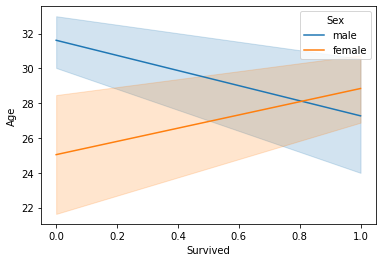

In [42]:
sns.lineplot(data=df_train, x='Survived', y='Age', hue = 'Sex')

In [50]:
y=df_train["Survived"]
type(y)

pandas.core.series.Series

In [15]:

x=df_train[['Sex','Age','Fare','Pclass','Embarked']]
x.dtypes

Sex          object
Age         float64
Fare        float64
Pclass        int64
Embarked     object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(x["Sex"])
x.iloc[:,4]= le.fit_transform(x.iloc[:,4])

C:\Users\lyann\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
le.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [18]:
new_x=x.drop("Sex", axis = 1)
new_x
new_x["Sex"] = label
new_x.head()

,Age,Fare,Pclass,Embarked,Sex
0,22.0,7.2500,3,2,1
1,38.0,71.2833,1,0,0
2,26.0,7.9250,3,2,0
3,35.0,53.1000,1,2,0
4,35.0,8.0500,3,2,1


In [19]:
data=new_x.fillna(new_x.mean())
data

,Age,Fare,Pclass,Embarked,Sex
0,22.000000,7.2500,3,2,1
1,38.000000,71.2833,1,0,0
2,26.000000,7.9250,3,2,0
3,35.000000,53.1000,1,2,0
4,35.000000,8.0500,3,2,1
...,...,...,...,...,...
886,27.000000,13.0000,2,2,1
887,19.000000,30.0000,1,2,0
888,29.699118,23.4500,3,2,0
889,26.000000,30.0000,1,0,1


In [20]:
X=data
X.head(2)

,Age,Fare,Pclass,Embarked,Sex
0,22.0,7.2500,3,2,1
1,38.0,71.2833,1,0,0


In [21]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [22]:
df_train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(X,y,random_state=1)

In [24]:
df_test = pd.DataFrame(pd.read_csv('test.csv'))

In [25]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_test.shape

(418, 11)

In [56]:
y1=pd.DataFrame(pd.read_csv("gender_submission.csv")).drop("PassengerId", axis=1)
Y1 = y1.iloc[:,0]
Y1

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [28]:
x1=df_test[['Sex','Age','Fare', 'Pclass', 'Embarked']]
x1.iloc[:,4]= le.fit_transform(x1.iloc[:,4])

C:\Users\lyann\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_label1 = le.fit_transform(x1["Sex"])
new_x1=x1.drop("Sex", axis = 1)
new_x1
new_x1["Sex"] = new_label1
new_x1.head()

,Age,Fare,Pclass,Embarked,Sex
0,34.5,7.8292,3,1,1
1,47.0,7.0000,3,2,0
2,62.0,9.6875,2,1,1
3,27.0,8.6625,3,2,1
4,22.0,12.2875,3,2,0


In [30]:
new_data=new_x1.fillna(new_x1.mean())
X1=new_data


In [31]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1, random_state=1,test_size=.30 )

In [32]:
from sklearn.metrics import accuracy_score
def model_check(model,xtrain,ytrain,xtest,ytest):
    model=model
    model.fit(xtrain,ytrain)
    y_model=model.predict(xtest)
    return accuracy_score(ytest,y_model)

In [33]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import LeaveOneOut
def model_validation(model,x,y):
    return cross_val_score(model, x,y, cv=LeaveOneOut())
    

In [34]:
from sklearn.model_selection import cross_val_score 
def model_validation_new(model,x,y):
    return cross_val_score(model, x,y, cv=5)

In [43]:
from sklearn.naive_bayes import GaussianNB
model_check(GaussianNB(),x_train,y_train,x_test,y_test)

0.7533632286995515

In [58]:
from sklearn.naive_bayes import GaussianNB
model_check(GaussianNB(),x_train,y_train,X1,Y1)

0.854066985645933

In [36]:
model_validation(GaussianNB(),X,y)

array([1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [46]:
model_validation_new(GaussianNB(),X,y).mean()

0.7811938986880923

In [65]:
model_validation_new(GaussianNB(),X1,Y1).mean()

1.0

In [38]:
from sklearn import svm
model_check(svm.SVC(),x_train,y_train,X1,y1)

0.6602870813397129

In [39]:
model_validation(svm.SVC(),X,y).mean()

0.6734006734006734

In [66]:
model_validation(svm.SVC(),X1,Y1).mean()

0.631578947368421